In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

In [30]:
def func(B):
    return B**(-1.34-1)

In [31]:
x_points=np.array([0.026759156482271052,
    24.129879967482566,
    9.948984695807717,
    5.986508831529978,
    2.468295939576663,
    1.2588302360222408,
    0.6891586547906883,
    0.31230981403552904,
    0.15373208336281427,
    0.08719821957636467,
    0.04447106749641235,
    0.10659175217006503])
y_points=np.array([
     9.460271806598691e-17,
     8.311486711467128e-16,
     2.64050349698218e-15,
     2.2150397593996658e-14,
     1.0668723256342924e-13,
     4.473036166359711e-13,
     2.8432513959539297e-12,
     1.5021276049021014e-11,
     5.741642455935698e-11,
     3.6160375504847965e-11,
    2.765458007663453e-10,
    9.201432015283794e-10,
])
C=np.zeros_like(y_points)
for i in range(len(C)):
    C[i]=y_points[i]/func(x_points[i])

In [32]:
x_points=np.array([0.03119484558714266,
0.03526446326168231,
0.045065703377454774,
0.05416613036581878,
0.07825122125870168,
0.10632299922004768,
0.14744805674671072,
0.18842908056251503,
0.26131224633732447,
0.36986849255019205,
0.5343313441757622,
0.7563071825477566,
1.2351394020824031,
1.8587918911465655,
2.685307858723787,
3.574822130749999,
4.568391487375635,
6.875085547429002,
11.459656438316879,
18.336380373335885
])
y_points=np.array([ 5.883580272306244e-10,
 4.635444517002062e-10,
 2.656247711992344e-10,
 1.6476303991421424e-10,
 7.43852259232429e-11,
 3.355872027974712e-11,
 1.6403973033526905e-11,
 9.399964917727088e-12,
 4.24177536979212e-12,
 1.9145725490236396e-12,
 7.97951500493511e-13,
 3.6016429563359235e-13,
 1.1826467144141442e-13,
 4.552426390404096e-14,
 1.897350649345563e-14,
 9.270129451109806e-15,
 5.312060160372363e-15,
 2.044800240575043e-15,
 6.199915435745133e-16,
 2.035342070708905e-16
])
C=np.zeros_like(y_points)
for i in range(len(C)):
    C[i]=y_points[i]/func(x_points[i])

In [33]:
x_points.sort()
y_points.sort()

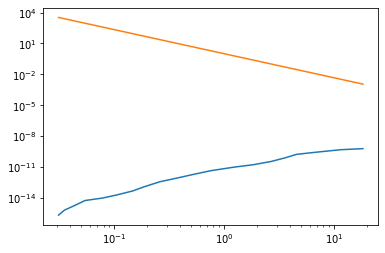

In [34]:
plt.plot(x_points,y_points)
plt.plot(x_points,x_points**(-2.34))
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

In [35]:
print(C)

[1.76114668e-13 1.84867521e-13 1.88047937e-13 1.79383657e-13
 1.91538427e-13 1.77056993e-13 1.86022052e-13 1.89222330e-13
 1.83527654e-13 1.86768055e-13 1.84099843e-13 1.87350348e-13
 1.93852057e-13 1.94197186e-13 1.91422839e-13 1.82684282e-13
 1.85827138e-13 1.86157980e-13 1.86572360e-13 1.83988744e-13]


In [36]:
Coef=sum(C)/len(C)

In [37]:
print(Coef)

1.8593510364363385e-13


In [38]:
def Fin_func(B):
    return Coef*B**(-1.34-1)

/home/sdd/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


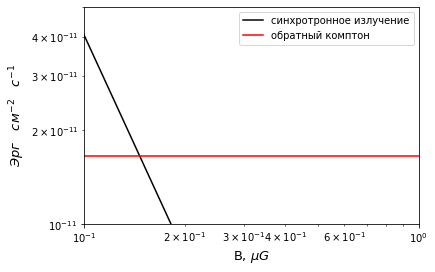

In [39]:
#non_thermal
#plot
x=np.linspace(0,100,10000)
Flux_R=Fin_func(x)
Flux_X=np.ones(10000)
Flux_X*=1.65e-11
#plt.plot(x,Flux_R,color='black',label='синхротронное излучение')
plt.plot(x_points,Coef*x_points**(-2.34),color='black',label='синхротронное излучение')
#plt.plot(x_points*2.8,Coef*x_points**(-2.34),'--',color='black')p
#plt.plot(x,Flux_R*11,'-.',color='black')
plt.plot(x,Flux_X,color='red',label='обратный комптон')
#plt.plot(x,Flux_X/11,'--',color='red')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
xmin,xmax,ymin,ymax=plt.axis([1e-1,1,1e-11,5e-11])
plt.legend(loc='upper right')
plt.xlabel(r'B, $\mu G$',fontsize=13)
plt.ylabel(r'$Эрг \quad см^{-2} \quad с^{-1}$',fontsize=13)
#plt.savefig('Magnetic_Field_un',dpi=500)
plt.show()

In [40]:
(1.92e-11/Coef)

103.26183503680414

In [41]:
Fin_func(1.372e-1)

1.940674813784482e-11

In [42]:
Coef

1.8593510364363385e-13

In [43]:
Coef*(2e-1)**(-1.34-1)

8.034358387592485e-12

In [44]:
Fin_func(2e-1)

8.034358387592485e-12

In [45]:
def Integrate(f,a,limit):
    r=0.0005
    Int=0
    while r<limit:
        Int+=f(r,a)*r^2*0.001
        r+=0.001
    return 2*np.pi*Int

In [46]:
def Y(r):
    return (1+(r/r_c)**2)**(-3*b)
def num(r,a):
    return (1+(r/r_c)**2)**(-3*b*(1-2.34*a/4))
    #return Y(r)*param(ro(r),a)**(-alpha-1)

In [47]:
r_c=10.68
limit=60
b=0.741
alpha=1.34

In [48]:
a_arr=np.linspace(0,1,100)

In [49]:
def f(a):
    r_c=10.68
    limit=60
    b=0.741
    alpha=1.34
    r=0.0001
    Int=0
    while r<limit:
        Int+=num(r,a)*(r**2)*0.001
        r+=0.001
    numen=Int
    r=0.0005
    Int=0
    while r<limit:
        Int+=Y(r)*(r**2)*0.001
        r+=0.001
    denumen=Int
    return (numen,denumen)

In [50]:
func_num=np.zeros_like(a_arr)
func_denum=np.zeros_like(a_arr)
for i in range(len(a_arr)):
    (func_num[i],func_denum[i])=f(a_arr[i])

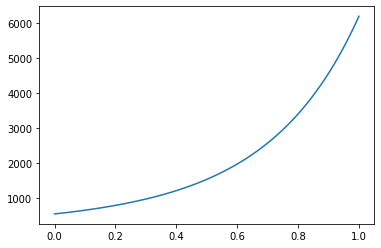

In [51]:
plt.plot(a_arr,func_num)

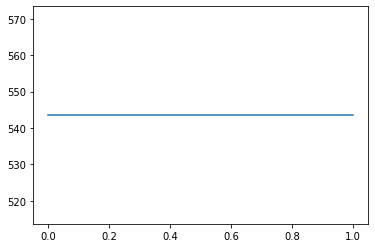

In [52]:
plt.plot(a_arr,func_denum)

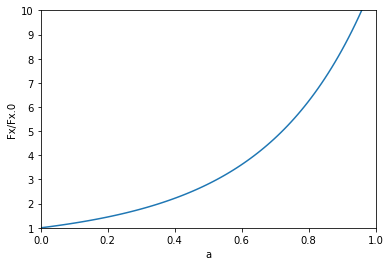

In [53]:
plt.plot(a_arr,func_num/func_denum)
xmin,xmax,ymin,ymax=plt.axis([0,1,1,10])
plt.xlabel('a')
plt.ylabel('Fx/Fx.0')
plt.savefig('Nonuniform_Flux',dpi=1000)
plt.show()

In [54]:
i=99
print(func_num[i]/func_denum[i])

11.375719040439275


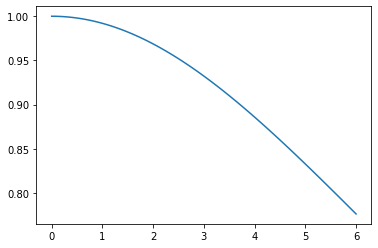

In [55]:
plt.plot(np.linspace(0,6,100),num(np.linspace(0,6,100),1))

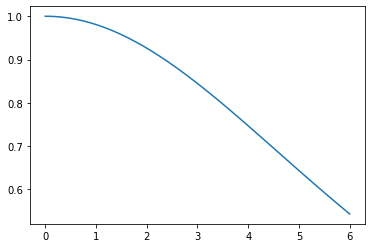

In [56]:
plt.plot(np.linspace(0,6,100),Y(np.linspace(0,6,100)))